In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from libraries import tfim_functions
from libraries import utils
from libraries import training
import torch
import torch.nn as nn
import numpy as np
import kan

In [2]:
data = pd.read_csv('data/MLP_n_10-40_data.csv')
data

,N,h,trial,epoch,energy,epoch time
0,10.0,0.1,0.0,0.0,-0.762017,0.156877
1,10.0,0.1,0.0,1.0,-1.112070,0.166104
2,10.0,0.1,0.0,2.0,-1.246961,0.152180
3,10.0,0.1,0.0,3.0,-1.753338,0.132123
4,10.0,0.1,0.0,4.0,-2.738113,0.099907
...,...,...,...,...,...,...
35995,40.0,10.0,2.0,995.0,-400.728699,1.375649
35996,40.0,10.0,2.0,996.0,-400.744232,1.280184
35997,40.0,10.0,2.0,997.0,-400.687073,1.368611
35998,40.0,10.0,2.0,998.0,-400.932434,1.513924


In [4]:
data['energy'].loc[(data['N'] == 10) & (data['h'] == 0.1) & (data['trial'] == 0)]

0      -0.762017
1      -1.112070
2      -1.246961
3      -1.753338
4      -2.738113
         ...    
995   -10.000001
996   -10.000001
997   -10.000001
998   -10.000001
999   -10.000001
Name: energy, Length: 1000, dtype: float64

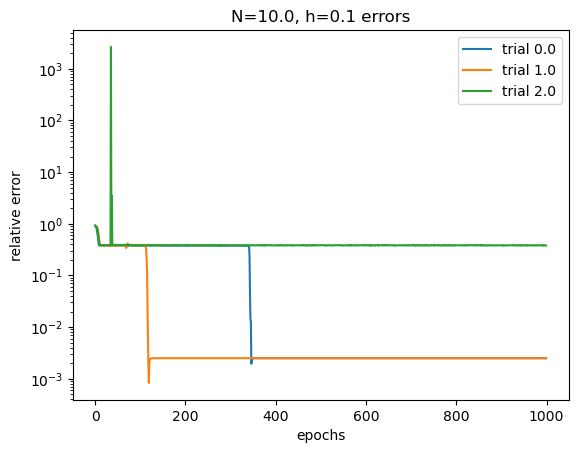

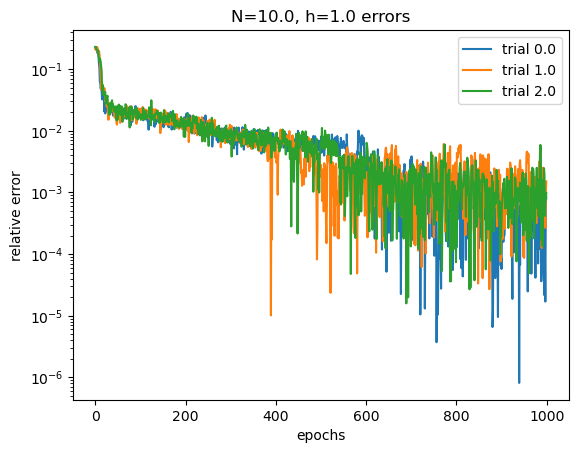

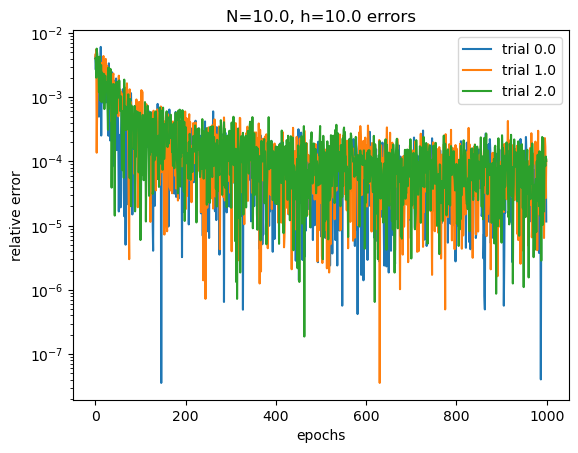

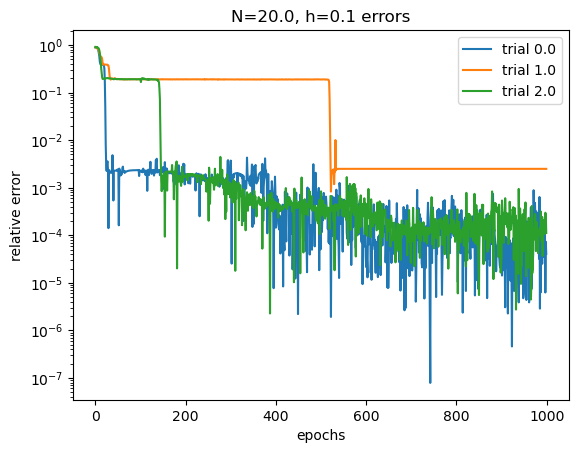

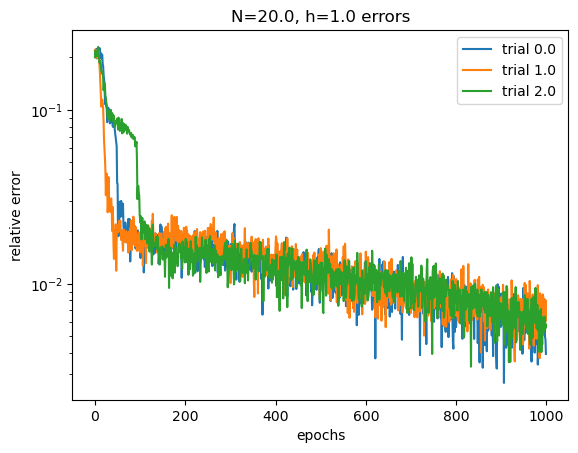

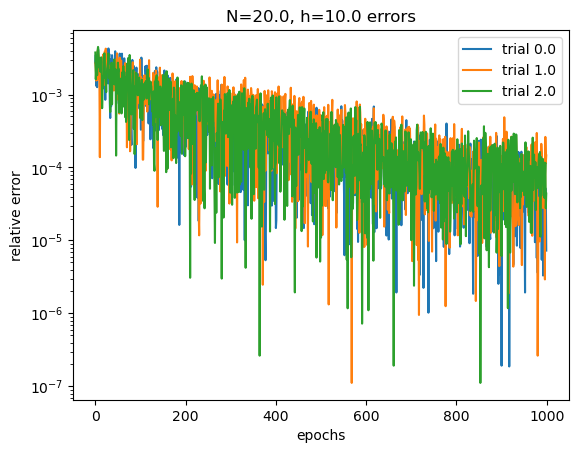

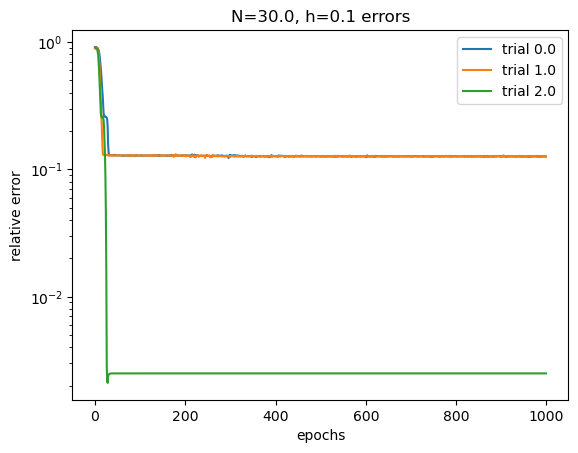

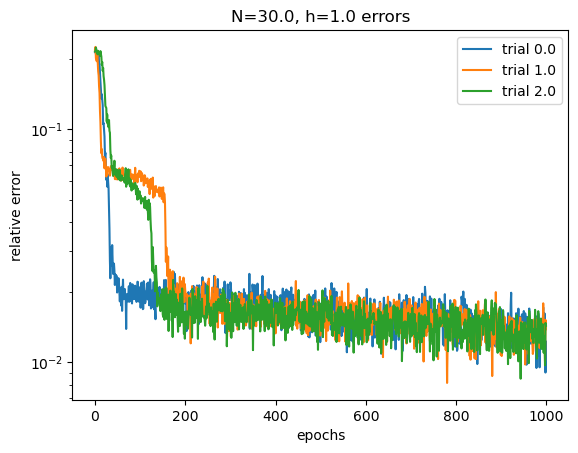

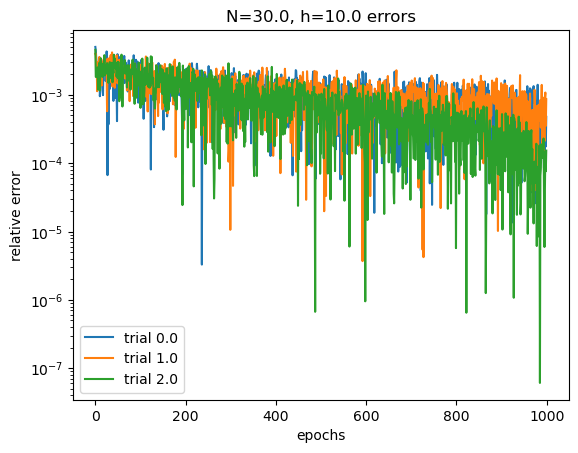

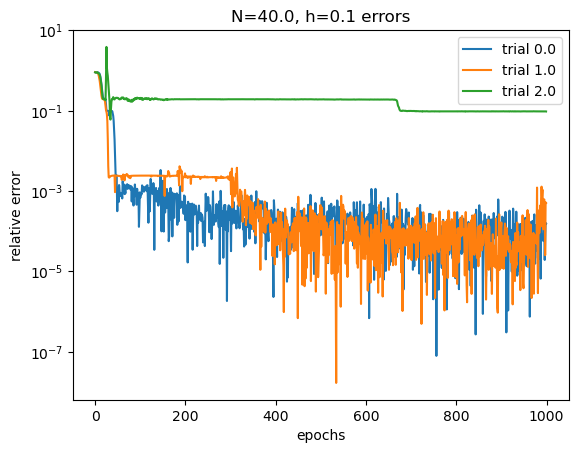

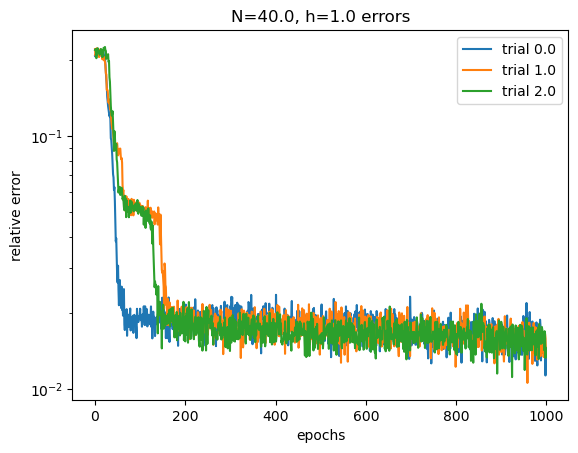

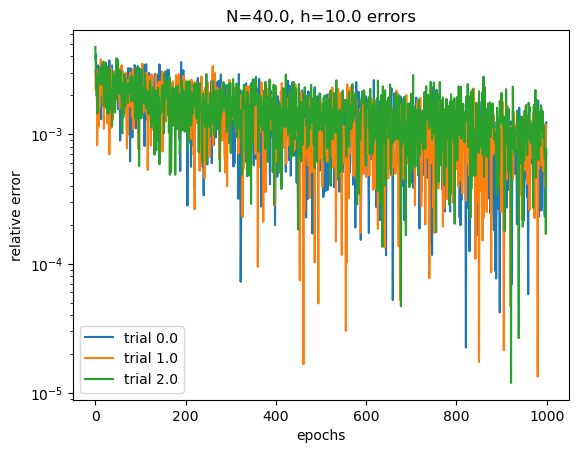

In [6]:
epochs = data['epoch'].unique()
for N in data['N'].unique():
    for h in data['h'].unique():
        true_gse = tfim_functions.ground_state_energy(h, N)
        for t in data['trial'].unique():
            energies = data['energy'].loc[(data['N'] == N) & (data['h'] == h) & (data['trial'] == t)]
            errors = abs((energies - true_gse) / true_gse)
            plt.plot(epochs, errors, label = f'trial {t}')
        plt.title(f'N={N}, h={h} errors')
        plt.xlabel('epochs')
        plt.ylabel('relative error')
        plt.yscale('log')
        plt.legend(loc = 'best')
        plt.show()